In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/admission_data.csv')
data

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0
...,...,...,...,...,...,...,...,...
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0


In [4]:
#Task:
#1. Missing value check and handling (10 points)
#2. Duplicated value check and handling (10 points)
#3. Statistical summaries of columns (15 points)
#4. Univariate analysis (30 points)
#5. Bivariate analysis (30 points)
#6. Overall summary/EDA findings (5 points)

In [5]:
#1 Missing value check and handling
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


In [6]:
# Data contains 8 columns and 505 rows
# All, execpt research_exp and admit_status, have some missing values

In [7]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [8]:
# drop na values
data = data.dropna()

In [9]:
# sanity check
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

In [10]:
#2. Duplicated value check and handling 
# number of duplicated data
data.duplicated().sum()

5

In [11]:
# sample duplicated rows
data[data.duplicated(keep=False)].head(10) 

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
10,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
311,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1


In [12]:
# drop duplicated rows
data = data.drop_duplicates()

In [13]:
# sanity check
data.duplicated().sum()

0

In [14]:
#3. Statistical summaries of columns 

# group column names based on type
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength',
              'recommendation_strength', 'gpa', 'admit_status']

In [15]:
# numerical statistical sumary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [16]:
# admit_status column is actually a boolean/binary column
# Overall, the minimum and maximum values make sense for each column
# Mean ~ 50% (Median) in All columns, except admit_status are indicating somewhat a symmetrical distribution
# Mean << 50% (Median) in admid_status, indicating  negatively skewed distribution

In [17]:
# describe method on categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


In [18]:
# Confirmed: there is no the unique key
# The data have YES dependents (YES is the dominant values)
# Only research_exp have 2 unique values

In [19]:
# showing the precise value counts
for col in categoricals[1:]:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

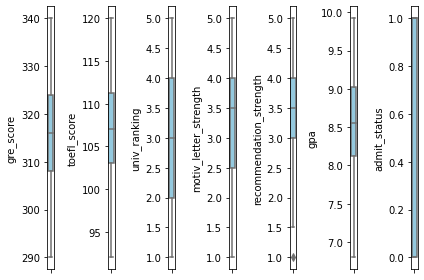

In [20]:
#4. Univariate analysis
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

In [21]:
# There is no oulier in numericals columns, except recommendation_strength

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

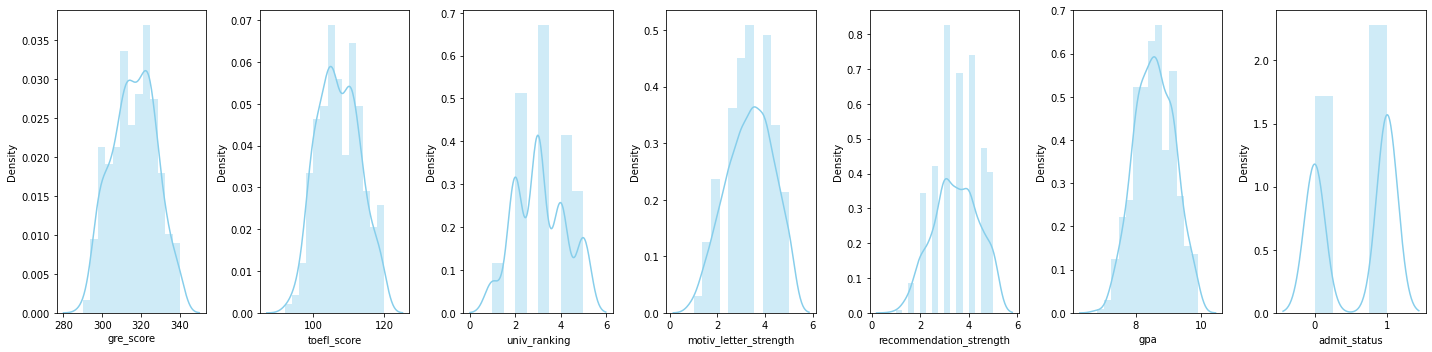

In [22]:
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [23]:
# admid_status is bimodal in distribution
# All columns, except admit_status are indicating a symmetrical distribution (lebih condong ke distribusi normal)

In [24]:
#5. Bivariate analysis
# remember the dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


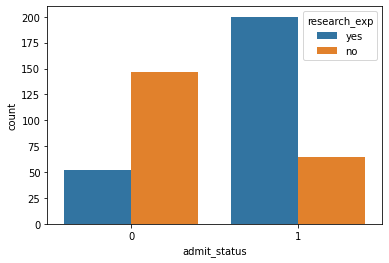

In [25]:
# admit_status vs research_exp likelihood (membandingkan data admit_status pada col research_exp)
sns.countplot(data=data,
            x='admit_status',
            hue='research_exp')

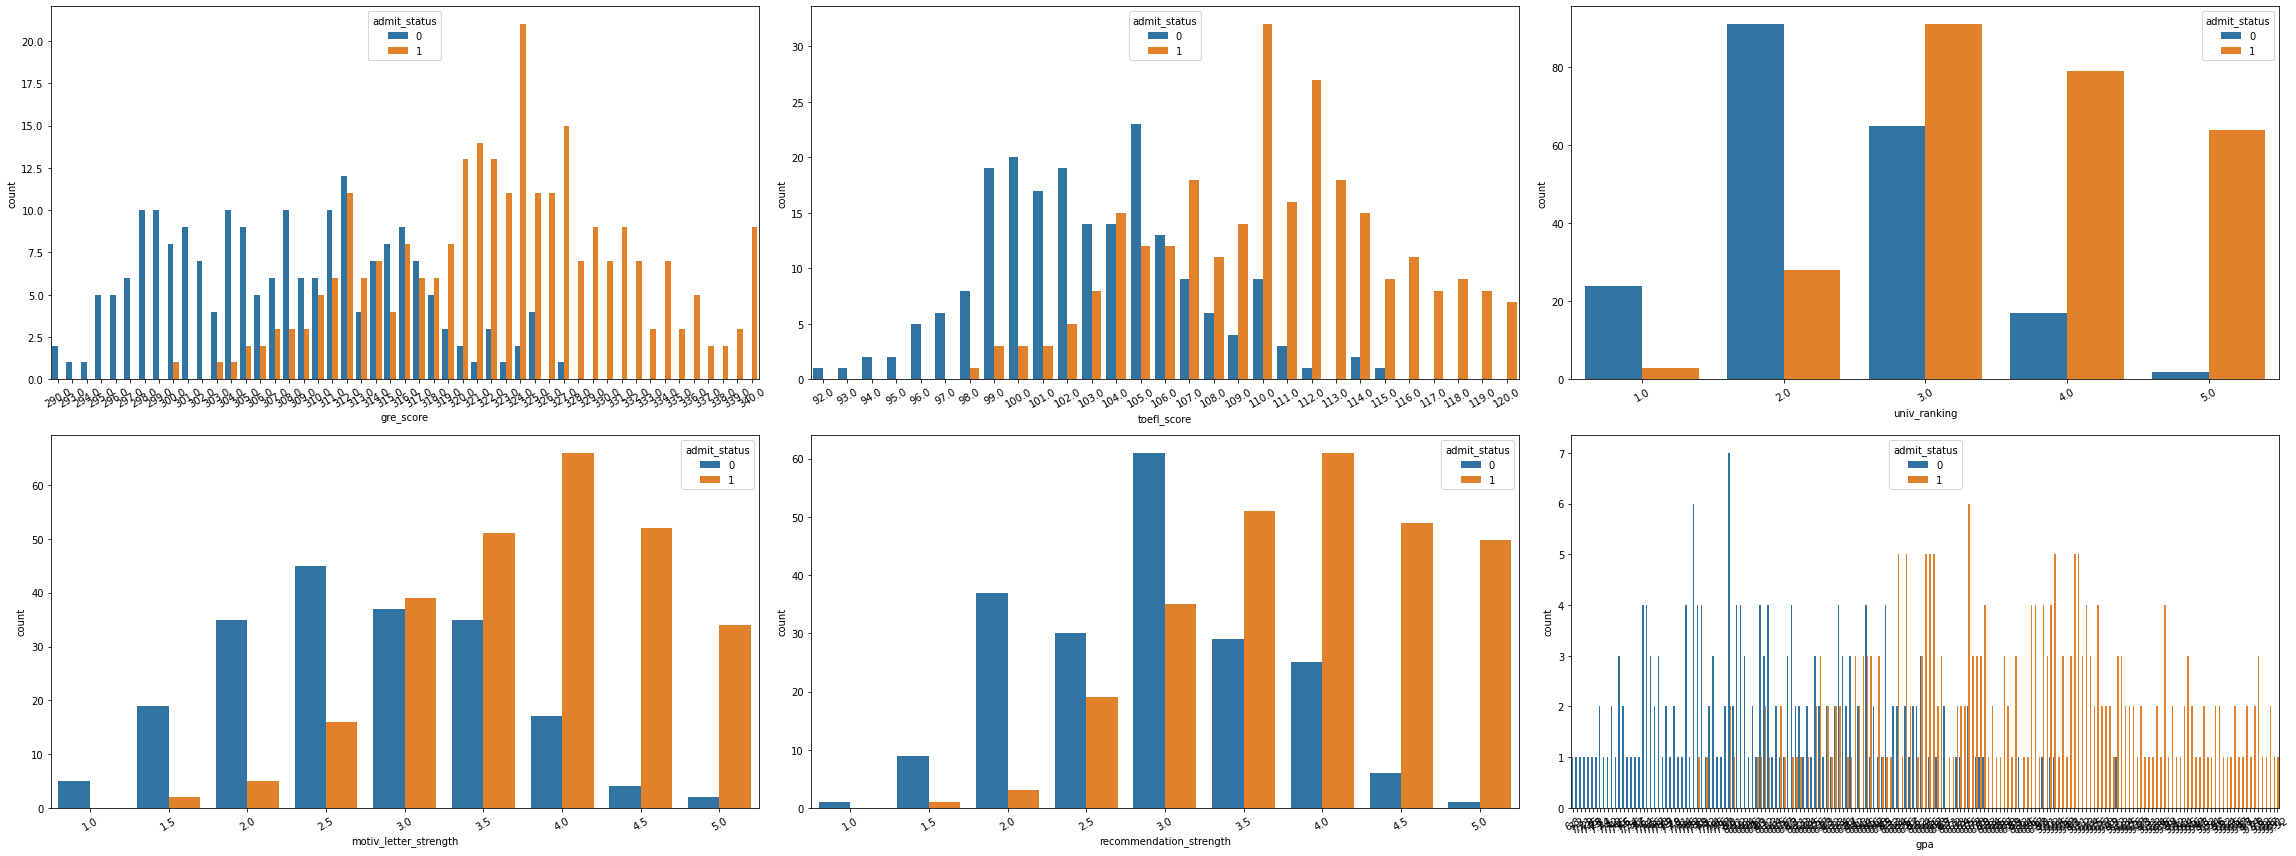

In [55]:
features = numericals[0:-1] #exclude index -1 (admit_status)
plt.figure(figsize=(32,12))
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.countplot(data=data,
            x=features[i],
            hue='admit_status')
    plt.xticks(rotation=30)
    plt.tight_layout()

In [35]:
# prospective employees with toefl_score > 110.0 is more relatively to admit_status (accepted)
# prospective employees with univ_ranking > 3.0 is more relatively to admit_status (accepted)
# prospective employees with motiv_letter_strength > 3.0 is more relatively to admit_status (accepted)
# prospective employees with recommendation_strength > 4.0 is more relatively to admit_status (accepted)
# prospective employees with gap score > more ... s more relatively to admit_status (accepted) 
# Many of prospective employees accepted when gre_score > 320.0

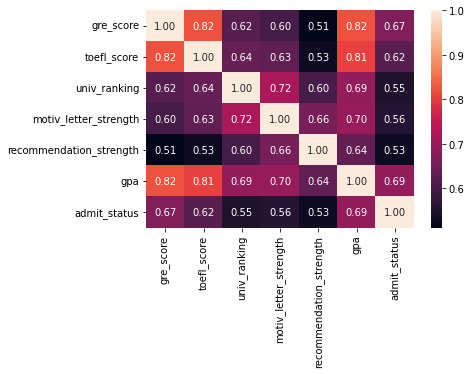

In [36]:
# Heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [37]:
# gpa, toefl_score, motiv_letter_strenght are 0.72 to 0.82 are closely 1
# gpa, toefl_score, motiv_letter_strenght are highly correlated --> choose one of them for modelling (redundant features)

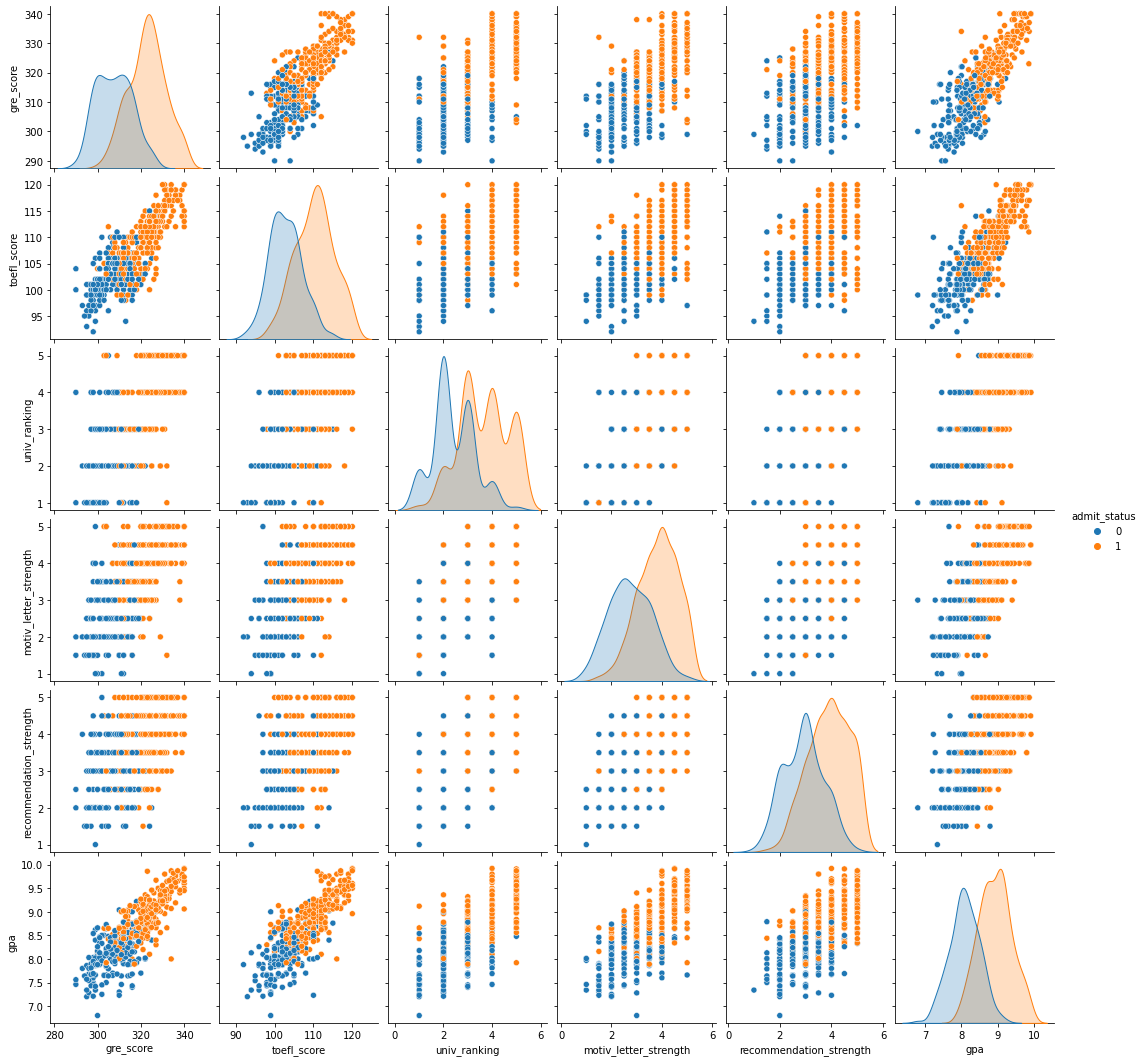

In [38]:
# Pairplot on admit_status
sns.pairplot(data, hue='admit_status')

In [39]:
# Admitted status employees are accepted relatively from gre_score, toefl_score, motiv_letter_strenght, gpa
# univ_ranking and recommendation_strenght tends to be impactly in admitted prospective employee
# Mostly admitted status of employees from gre_score

In [40]:
#6. EDA Conclusion

# The data does not contain major issues. There are only some NULL values and duplicated rows.
# Overall, the minimum and maximum values make sense for each column.
# Mostly the columns are closely normal in distribution, except admit_status
# From barcharts of categorical columns vs admit_status founded many useful insights!
# From correlation heatmap: we note that gpa, toefl_score, motiv_letter_strenght are highly correlated --> choose one of them for modelling (redundant features)
